# **Linking to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Importing Libraries and Reading The Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
hd = pd.read_csv('/content/clean_heart.csv')

In [ ]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0.0,0.292453,0.303887,0,0.5,0.740458,0,0.227273,1.0,0.50,1.0,0
1,0.500000,1,0.0,0.433962,0.272085,1,0.0,0.641221,1,0.704545,0.0,0.00,1.0,0
2,0.854167,1,0.0,0.481132,0.169611,0,0.5,0.412214,1,0.590909,0.0,0.00,1.0,0
3,0.666667,1,0.0,0.509434,0.272085,0,0.5,0.687023,0,0.000000,1.0,0.25,1.0,0
4,0.687500,0,0.0,0.415094,0.593640,1,0.5,0.267176,0,0.431818,0.5,0.75,0.5,0


# **Applying PCA**

**Separate features (X) and target (y)**

In [ ]:
X = hd.drop("target", axis=1)
y = hd["target"]

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Feature shape: (298, 13)
Target distribution:
 target
1    162
0    136
Name: count, dtype: int64


**Apply PCA without specifying number of components initially (PCA is used here mainly for analysis, not compression)**

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)

**Explained variance**

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio per component:\n", explained_variance)

cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative explained variance:\n", cumulative_variance)

Explained variance ratio per component:
 [0.2621259  0.17595931 0.11711545 0.08898093 0.07826911 0.06399603
 0.05789393 0.04910152 0.02842162 0.02651812 0.02138504 0.01803124
 0.0122018 ]

Cumulative explained variance:
 [0.2621259  0.43808521 0.55520067 0.64418159 0.7224507  0.78644674
 0.84434067 0.89344218 0.9218638  0.94838192 0.96976696 0.9877982
 1.        ]


**Scree Plot (Variance per Component)**

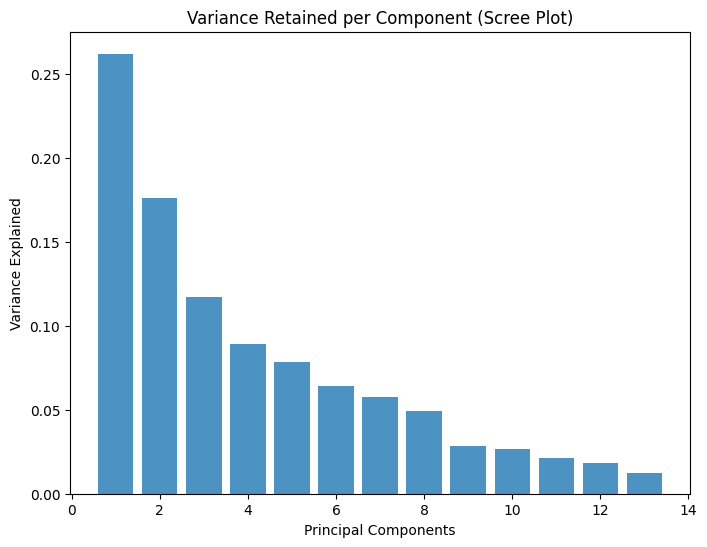

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.8, align='center')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.title('Variance Retained per Component (Scree Plot)')
plt.show()

**Cumulative Explained Variance**

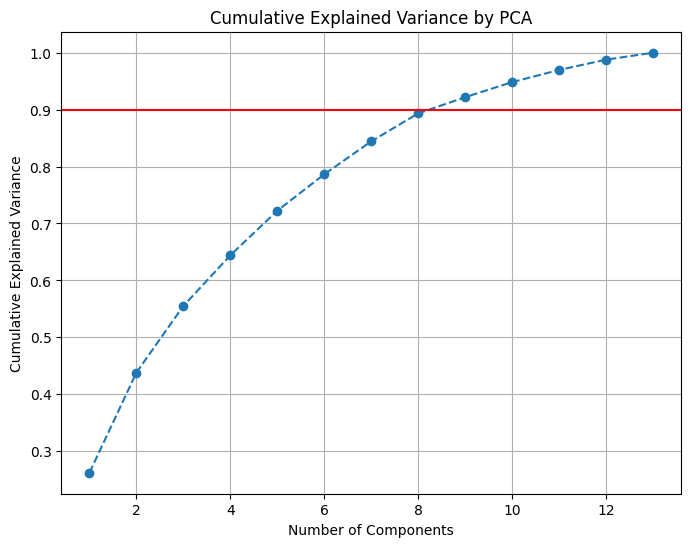

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()

**Visualize PCA Scatter Plot for 2 Components**

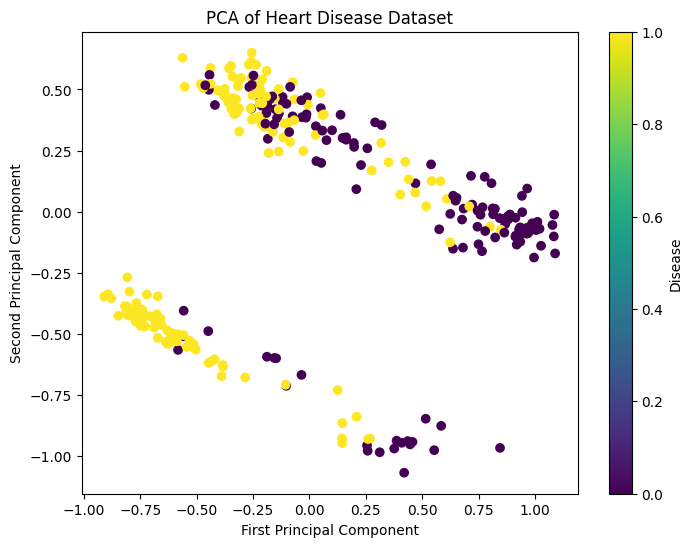

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Heart Disease Dataset')
plt.colorbar(label='Disease')
plt.show()

**Selecting the optimal number of components (~90%)**

In [ ]:
pca = PCA(n_components=8)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced.shape

(298, 8)

#**Saving The PCA-Transformed Dataset**

In [ ]:
# Suppose you used k components
n_components = X_reduced.shape[1]
columns = [f"PC{i+1}" for i in range(n_components)]

hd_pca = pd.DataFrame(X_reduced, columns=columns)
#hd_pca.to_csv("/content/drive/MyDrive/Heart Disease Risks Project/data/pca_heart.csv", index=False)